<a href="https://colab.research.google.com/github/Madihajavaid12345/Car-Price-Prediction/blob/main/project_3_data_zenix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📄 Car Price Prediction Project Report
1. Project Idea

The price of a car depends on many factors such as brand, model, fuel type, transmission, year, and mileage. Predicting car prices is an important real-world use case in machine learning, helping buyers, sellers, and dealerships make data-driven decisions.

2. Objective

To build a machine learning model that predicts the selling price of cars based on given features such as year, present price, kilometers driven, fuel type, transmission type, and ownership details.

3. Dataset

Source: Kaggle Car Price Dataset

Rows: 301

Columns: 9 (Car Name, Year, Selling Price, Present Price, Driven Kms, Fuel Type, Selling Type, Transmission, Owner)

4. Steps Performed

Data Exploration

Checked shape, data types, summary statistics.

Selling price ranged from 0.1 to 35 Lakhs.

Data Preprocessing

Converted categorical features into numeric (One-Hot Encoding).

Dropped car name since it doesn’t impact price much.

Feature Selection & Splitting

Features: Year, Present_Price, Driven_kms, Owner, Fuel_Type, Selling_type, Transmission.

Target: Selling_Price.

Split dataset into 80% training and 20% testing.

Model Training

Used Linear Regression model.

Later evaluated performance.

Evaluation Metrics

R² Score: 0.60 (model explains 60% of the variance).

Mean Absolute Error: 2.03 (avg error in lakhs).

RMSE: 3.03 (bigger errors penalized).

Visualization

Created Actual vs Predicted Price bar chart for easy understanding.

Clear separation of actual values vs model predictions.

5. Results

The Linear Regression model provides baseline performance.

The model is useful but has limitations — predictions may be off by ~2–3 lakhs.

To improve results, advanced models like Random Forest or XGBoost can be used.

6. Conclusion

This project demonstrates how machine learning can be applied to predict car prices using Python.
Although Linear Regression gave moderate performance, it serves as a solid starting point for more advanced predictive modeling.

7. Tools & Libraries

Python

Pandas, Numpy

Scikit-learn

Matplotlib

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Step 2: Load dataset
df = pd.read_csv("/content/car data.csv")

# Show first rows
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [5]:
# Step 3: Handle categorical features
df = pd.get_dummies(df, drop_first=True)

# Check dataset after encoding
print(df.head())
print("Shape after encoding:", df.shape)

   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0               False   
1  2013           4.75           9.54       43000      0               False   
2  2017           7.25           9.85        6900      0               False   
3  2011           2.85           4.15        5200      0               False   
4  2014           4.60           6.87       42450      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Car_Name_Bajaj Avenger 150 street  ...  Car_Name_swif

In [6]:
# Step 4: Define Features (X) and Target (y)
X = df.drop("Selling_Price", axis=1)   # Independent variables
y = df["Selling_Price"]                # Dependent variable (target)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (301, 105)
y shape: (301,)


In [7]:
# Step 5: Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (240, 105)
Testing data shape: (61, 105)


In [8]:
# Step 6: Train Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [10]:
# Step 7: Evaluate Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.5997023481243802
Mean Absolute Error: 2.0365174791070033
Mean Squared Error: 9.221090393054562
Root Mean Squared Error: 3.0366248357435532


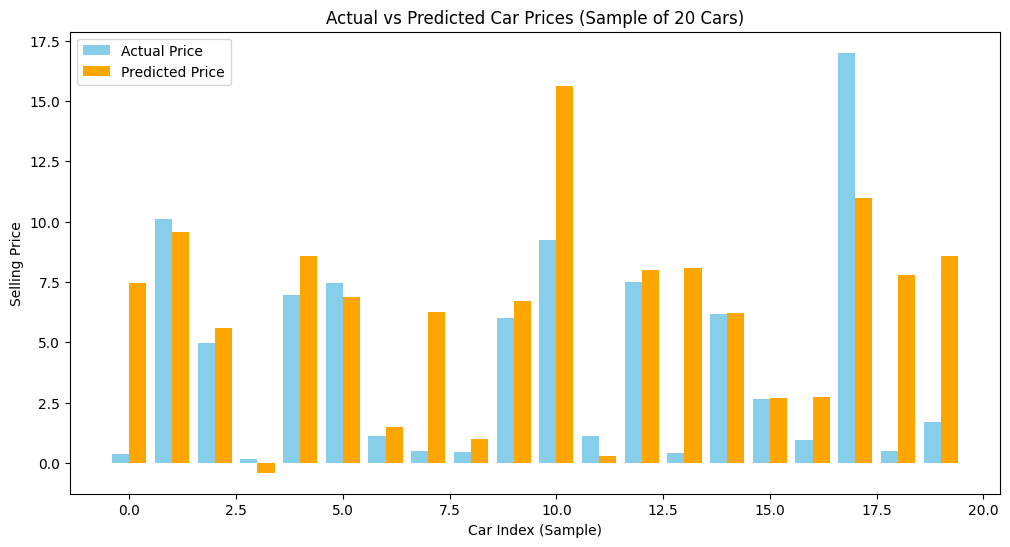

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Step 8: Simple Visualization (Layman Friendly)

# Pick first 20 cars from test set for visualization
sample_size = 20
x_axis = np.arange(sample_size)

plt.figure(figsize=(12,6))
plt.bar(x_axis - 0.2, y_test[:sample_size], 0.4, label='Actual Price', color='skyblue')
plt.bar(x_axis + 0.2, y_pred[:sample_size], 0.4, label='Predicted Price', color='orange')

plt.xlabel("Car Index (Sample)")
plt.ylabel("Selling Price")
plt.title("Actual vs Predicted Car Prices (Sample of 20 Cars)")
plt.legend()
plt.show()
